In [1]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

In [2]:
audio_dataset_path='C:/Users/oceanvue/Desktop/DeepShip Dataset'
metadata=pd.read_csv('C:/Users/oceanvue/Desktop/DeepShip Dataset/metadata-detailed.csv')
metadata.head()

,Recording ID,File_name,Folder_ID,Class_ID,Class,File_path,Ship Name,Date of Recording,Time of Recording,Durations (s),Distance (m)
0,1,1.wav,1,1,Cargo,Cargo\1\1.wav,SEASPAN SWIFT,20171104,203623,458,1583-1981
1,2,2.wav,2,1,Cargo,Cargo\2\2.wav,ISTRA ACE,20171104,223241,441,1535-1779
2,3,3.wav,3,1,Cargo,Cargo\3\3.wav,SAMOS WARRIOR,20171105,84406,297,642-1520
3,4,4.wav,4,1,Cargo,Cargo\4\4.wav,NYK REMUS,20171106,115234,331,1579-1906
4,5,5.wav,5,1,Cargo,Cargo\5\5.wav,SEASPAN RELIANT,20171107,452,208,477-1241


In [3]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [4]:
audio_dataset_path='C:/Users/oceanvue/Desktop/DeepShip Dataset'
metadata=pd.read_csv('C:/Users/oceanvue/Desktop/DeepShip Dataset/metadata-detailed.csv')
metadata.head()

import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

0it [00:00, ?it/s]


KeyError: 'fold'

In [5]:
import numpy as np
from tqdm import tqdm

# Initialize a list to store extracted features and labels
extracted_features = []

# Iterate through metadata and extract features
for index_num, row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path), row['Class'], str(row['Folder_ID']), row['File_name'])

    print(file_name)

    final_class_label = row['Class']
    data = features_extractor(file_name)
    extracted_features.append([data, final_class_label])

0it [00:00, ?it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\1\1.wav


1it [00:05,  5.24s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\2\2.wav


2it [00:07,  3.62s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\3\3.wav


3it [00:09,  2.78s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\4\4.wav


4it [00:11,  2.43s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\5\5.wav


5it [00:12,  1.99s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\6\6.wav


6it [00:15,  2.26s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\7\7.wav


7it [00:18,  2.50s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\8\8.wav


8it [00:19,  2.22s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\9\9.wav


9it [00:21,  2.06s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\10\10.wav


10it [00:23,  1.95s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\11\11.wav


11it [00:26,  2.17s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\12\12.wav


12it [00:27,  1.96s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\13\13.wav


13it [00:29,  1.98s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\14\14.wav


14it [00:31,  2.05s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\15\15.wav


15it [00:32,  1.76s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\16\16.wav


16it [00:34,  1.74s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\17\17.wav


17it [00:35,  1.60s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\18\18.wav


18it [00:38,  1.87s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\19\19.wav


19it [00:40,  1.90s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\20\20.wav


20it [00:42,  2.03s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\21\21.wav


21it [00:43,  1.78s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\22\22.wav


22it [00:45,  1.86s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\23\23.wav


23it [00:47,  1.67s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\24\24.wav


24it [00:48,  1.69s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\25\25.wav


25it [00:51,  1.83s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\26\26.wav


26it [00:52,  1.67s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\27\27.wav


27it [00:53,  1.52s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\28\28.wav


28it [00:56,  1.90s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\29\29.wav


29it [00:58,  1.94s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\30\30.wav


30it [01:00,  1.92s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\31\31.wav


31it [01:06,  3.09s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\32\32.wav


32it [01:10,  3.41s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\33\33.wav


33it [01:12,  2.99s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\34\34.wav


34it [01:14,  2.81s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\35\35.wav


35it [01:16,  2.50s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\36\36.wav


36it [01:17,  2.22s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\37\37.wav


37it [01:20,  2.35s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\38\38.wav


38it [01:21,  1.99s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\39\39.wav


39it [01:23,  2.01s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\40\40.wav


40it [01:26,  2.32s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\41\41.wav


41it [01:27,  1.95s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\42\42.wav


42it [01:30,  2.12s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\43\43.wav


43it [01:32,  2.09s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\44\44.wav


44it [01:33,  1.82s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\45\45.wav


45it [01:35,  1.91s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\46\46.wav


46it [01:39,  2.35s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\47\47.wav


47it [01:40,  2.02s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\48\48.wav


48it [01:43,  2.29s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\49\49.wav


49it [01:44,  2.06s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\50\50.wav


50it [01:46,  1.88s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\51\51.wav


51it [01:49,  2.14s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\52\52.wav


52it [01:51,  2.14s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\53\53.wav


53it [01:53,  2.12s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\54\54.wav


54it [01:55,  2.18s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\55\55.wav


55it [01:57,  2.15s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\56\56.wav


56it [02:00,  2.48s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\57\57.wav


57it [02:03,  2.39s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\58\58.wav


58it [02:05,  2.44s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\59\59.wav


59it [02:07,  2.26s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\60\60.wav


60it [02:09,  2.10s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\61\61.wav


61it [02:11,  2.07s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\62\62.wav


62it [02:12,  1.81s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\63\63.wav


63it [02:14,  1.90s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\64\64.wav


64it [02:17,  2.34s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\65\65.wav


65it [02:20,  2.29s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\66\66.wav


66it [02:21,  1.98s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\67\67.wav


67it [02:22,  1.76s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\68\68.wav


68it [02:24,  1.87s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\69\69.wav


69it [02:25,  1.64s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\70\70.wav


70it [02:27,  1.80s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\71\71.wav


71it [02:29,  1.74s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\72\72.wav


72it [02:31,  1.77s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\73\73.wav


73it [02:34,  2.05s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\74\74.wav


74it [02:36,  2.16s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\75\75.wav


75it [02:37,  1.91s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\76\76.wav


76it [02:40,  2.20s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\77\77.wav


77it [02:42,  2.18s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\78\78.wav


78it [02:44,  1.87s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\79\79.wav


79it [02:45,  1.74s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\80\80.wav


80it [02:48,  2.03s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\81\81.wav


81it [02:51,  2.42s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\82\82.wav


82it [02:52,  2.11s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\83\83.wav


83it [02:54,  1.92s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\84\84.wav


84it [02:56,  1.98s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\85\85.wav


85it [02:59,  2.33s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\86\86.wav


86it [03:00,  2.00s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\87\87.wav


87it [03:03,  2.12s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\88\88.wav


88it [03:06,  2.46s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\89\89.wav


89it [03:08,  2.39s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\90\90.wav


90it [03:10,  2.32s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\91\91.wav


91it [03:12,  2.07s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\92\92.wav


92it [03:14,  2.09s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\93\93.wav


93it [03:15,  1.83s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\94\94.wav


94it [03:18,  2.03s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\95\95.wav


95it [03:19,  1.88s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\96\96.wav


96it [03:21,  1.70s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\97\97.wav


97it [03:22,  1.71s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\98\98.wav


98it [03:26,  2.19s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\99\99.wav


99it [03:27,  1.86s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\100\100.wav


100it [03:29,  1.92s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\101\101.wav


101it [03:31,  1.90s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\102\102.wav


102it [03:33,  2.10s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\103\103.wav


103it [03:34,  1.82s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\104\104.wav


104it [03:36,  1.73s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\105\105.wav


105it [03:39,  2.06s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\106\106.wav


106it [03:41,  2.03s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\107\107.wav


107it [03:42,  1.83s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\108\108.wav


108it [03:44,  1.91s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Cargo\109\109.wav


109it [03:48,  2.50s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\1\1.wav


110it [03:48,  1.83s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\2\2.wav


111it [03:50,  1.87s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\3\3.wav


112it [03:54,  2.33s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\4\4.wav


114it [03:55,  1.44s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\5\5.wav
C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\6\6.wav


115it [03:55,  1.08s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\7\7.wav


117it [03:57,  1.00it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\8\8.wav
C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\9\9.wav


118it [03:57,  1.37it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\10\10.wav


119it [04:00,  1.16s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\11\11.wav


121it [04:03,  1.20s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\12\12.wav
C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\13\13.wav


122it [04:04,  1.25s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\14\14.wav


123it [04:04,  1.02it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\15\15.wav


125it [04:07,  1.07s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\16\16.wav
C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\17\17.wav


126it [04:07,  1.23it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\18\18.wav


127it [04:09,  1.00s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\19\19.wav


128it [04:10,  1.01s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\20\20.wav


129it [04:12,  1.39s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\21\21.wav


130it [04:17,  2.35s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\22\22.wav


131it [04:19,  2.31s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\23\23.wav


132it [04:20,  1.86s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\24\24.wav


133it [04:26,  3.22s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\25\25.wav


134it [04:27,  2.47s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\26\26.wav


135it [04:29,  2.29s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\27\27.wav


136it [04:29,  1.68s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\28\28.wav


137it [04:30,  1.64s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\29\29.wav


140it [04:31,  1.42it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\30\30.wav
C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\31\31.wav
C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\32\32.wav


141it [04:31,  1.58it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\33\33.wav


142it [04:32,  1.53it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\34\34.wav


143it [04:34,  1.03s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\35\35.wav


144it [04:36,  1.21s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\36\36.wav


145it [04:37,  1.34s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\37\37.wav


146it [04:38,  1.24s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\38\38.wav


147it [04:40,  1.31s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\39\39.wav


148it [04:42,  1.44s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\40\40.wav


150it [04:44,  1.29s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\41\41.wav
C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\42\42.wav


151it [04:46,  1.47s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\43\43.wav


152it [04:48,  1.53s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\44\44.wav


153it [04:49,  1.49s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\45\45.wav


154it [04:51,  1.63s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\46\46.wav


155it [04:53,  1.74s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\47\47.wav


156it [04:55,  1.78s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\48\48.wav


157it [04:57,  1.90s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\49\49.wav


158it [05:01,  2.36s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\50\50.wav


159it [05:02,  1.95s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\51\51.wav


160it [05:03,  1.90s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\52\52.wav


161it [05:05,  1.86s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\53\53.wav


162it [05:06,  1.42s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\54\54.wav


163it [05:13,  3.27s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\55\55.wav


164it [05:16,  3.13s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\56\56.wav


165it [05:17,  2.58s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\57\57.wav


166it [05:20,  2.74s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\58\58.wav


167it [05:23,  2.83s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\59\59.wav


169it [05:24,  1.59s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\60\60.wav
C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\61\61.wav


170it [05:25,  1.39s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\62\62.wav


172it [05:27,  1.05it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\63\63.wav
C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\64\64.wav


173it [05:27,  1.39it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\65\65.wav


174it [05:29,  1.06s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\66\66.wav


175it [05:29,  1.17it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\67\67.wav


176it [05:31,  1.10s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\68\68.wav


177it [05:31,  1.02it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\69\69.wav


179it [05:32,  1.64it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\70\70.wav
C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\71\71.wav


180it [05:34,  1.04s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\72\72.wav


181it [05:35,  1.16s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\73\73.wav
C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\74\74.wav


183it [05:38,  1.13s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\75\75.wav


184it [05:40,  1.36s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\76\76.wav


185it [05:43,  1.87s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\77\77.wav


186it [05:44,  1.70s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\78\78.wav


187it [05:44,  1.28s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\79\79.wav


188it [05:45,  1.01it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\80\80.wav


189it [05:45,  1.25it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\81\81.wav
C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\82\82.wav


191it [05:45,  1.94it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\83\83.wav


192it [05:46,  1.67it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\84\84.wav


193it [05:47,  1.57it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\85\85.wav


194it [05:49,  1.06s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\86\86.wav


195it [05:49,  1.15it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\87\87.wav


196it [05:52,  1.24s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\88\88.wav


197it [05:53,  1.37s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\89\89.wav


198it [05:54,  1.08s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\90\90.wav


199it [05:55,  1.28s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\91\91.wav


200it [05:56,  1.03it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\92\92.wav


201it [05:57,  1.16s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\93\93.wav


202it [05:58,  1.04s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\94\94.wav


203it [06:01,  1.57s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\95\95.wav


204it [06:02,  1.42s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\96\96.wav


205it [06:13,  4.23s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\97\97.wav


206it [06:13,  3.04s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\98\98.wav


207it [06:14,  2.45s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\99\99.wav


208it [06:16,  2.21s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\100\100.wav


209it [06:16,  1.68s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\101\101.wav


210it [06:20,  2.46s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\102\102.wav


211it [06:22,  2.22s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\103\103.wav


213it [06:26,  2.00s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\104\104.wav
C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\105\105.wav


214it [06:28,  1.94s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\106\106.wav


215it [06:29,  1.45s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\107\107.wav


216it [06:32,  2.17s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\108\108.wav


217it [06:34,  2.00s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\109\109.wav


218it [06:35,  1.62s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\110\110.wav


219it [06:35,  1.28s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\111\111.wav


220it [06:36,  1.05s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\112\112.wav


221it [06:38,  1.40s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\113\113.wav


222it [06:39,  1.24s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\114\114.wav


223it [06:42,  1.79s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\115\115.wav


224it [06:45,  2.18s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\116\116.wav


225it [06:47,  2.22s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\117\117.wav


226it [06:50,  2.31s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\118\118.wav


227it [06:51,  1.93s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\119\119.wav


228it [06:51,  1.42s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\120\120.wav


229it [06:52,  1.28s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\121\121.wav


230it [06:52,  1.03it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\122\122.wav


231it [06:54,  1.22s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\123\123.wav


232it [06:57,  1.58s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\124\124.wav


233it [06:59,  1.75s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\125\125.wav


234it [07:02,  2.18s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\126\126.wav
C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\127\127.wav


237it [07:03,  1.12s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\128\128.wav
C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\129\129.wav


238it [07:05,  1.32s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\130\130.wav


239it [07:06,  1.36s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\131\131.wav


241it [07:08,  1.07it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\132\132.wav
C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\133\133.wav


243it [07:09,  1.28it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\134\134.wav
C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\135\135.wav


244it [07:11,  1.15s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\136\136.wav


245it [07:13,  1.34s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\139\139.wav


246it [07:14,  1.33s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\140\140.wav


247it [07:16,  1.45s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\141\141.wav


248it [07:18,  1.51s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\142\142.wav


249it [07:19,  1.64s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\143\143.wav


250it [07:20,  1.40s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\144\144.wav


251it [07:21,  1.06s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\145\145.wav


252it [07:22,  1.13s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\146\146.wav


253it [07:23,  1.22s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\147\147.wav


254it [07:24,  1.12s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\148\148.wav


255it [07:25,  1.09it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\149\149.wav


256it [07:27,  1.35s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\150\150.wav


257it [07:27,  1.10s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\151\151.wav


258it [07:33,  2.54s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\152\152.wav


259it [07:34,  2.00s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\153\153.wav


260it [07:36,  2.00s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\154\154.wav


261it [07:37,  1.59s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\155\155.wav


262it [07:39,  1.79s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\156\156.wav


263it [07:39,  1.34s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\157\157.wav


265it [07:42,  1.16s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\158\158.wav
C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\159\159.wav


266it [07:44,  1.46s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\160\160.wav


267it [07:45,  1.31s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\161\161.wav


268it [07:47,  1.52s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\162\162.wav


269it [07:47,  1.24s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\163\163.wav


270it [07:50,  1.73s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\164\164.wav


271it [07:52,  1.87s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\165\165.wav
C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\166\166.wav


273it [07:55,  1.55s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\167\167.wav
C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\168\168.wav


275it [07:56,  1.09s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\169\169.wav


276it [07:56,  1.08it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\170\170.wav


277it [07:58,  1.18s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\171\171.wav


278it [08:02,  2.01s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\172\172.wav


279it [08:04,  1.85s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\173\173.wav


281it [08:05,  1.22s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\174\174.wav
C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\175\175.wav


282it [08:07,  1.46s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\176\176.wav


283it [08:10,  1.80s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\177\177.wav


284it [08:11,  1.64s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\178\178.wav


285it [08:13,  1.75s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\179\179.wav


286it [08:16,  2.30s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\180\180.wav


287it [08:17,  1.81s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\181\181.wav


288it [08:18,  1.41s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\182\182.wav


289it [08:19,  1.41s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\183\183.wav


290it [08:21,  1.68s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\184\184.wav


291it [08:22,  1.30s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\185\185.wav


292it [08:24,  1.63s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\186\186.wav


293it [08:26,  1.81s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\187\187.wav


294it [08:27,  1.36s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\188\188.wav


295it [08:27,  1.05s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\189\189.wav
C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\190\190.wav


299it [08:27,  2.43it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\191\191.wav
C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\192\192.wav
C:\Users\oceanvue\Desktop\DeepShip Dataset\Passenger\193\193.wav


300it [08:28,  1.88it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\1\1.wav


301it [08:30,  1.25it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\2\2.wav


302it [08:31,  1.21it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\3\3.wav


303it [08:33,  1.21s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\4\4.wav


304it [08:35,  1.32s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\5\5.wav


305it [08:35,  1.04s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\6\6.wav


306it [08:36,  1.04s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\7\7.wav


307it [08:39,  1.60s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\8\8.wav


309it [08:40,  1.11it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\9\9.wav
C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\10\10.wav


310it [08:40,  1.40it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\11\11.wav


311it [08:42,  1.20s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\12\12.wav


312it [08:43,  1.09it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\13\13.wav


314it [08:44,  1.40it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\14\14.wav
C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\15\15.wav


315it [08:46,  1.20s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\16\16.wav


316it [08:49,  1.71s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\17\17.wav


317it [08:51,  1.84s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\18\18.wav


319it [08:52,  1.03s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\19\19.wav
C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\20\20.wav


321it [08:52,  1.46it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\21\21.wav
C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\22\22.wav


322it [08:55,  1.18s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\23\23.wav


324it [08:57,  1.11s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\24\24.wav
C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\25\25.wav


325it [09:00,  1.69s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\26\26.wav


326it [09:02,  1.79s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\27\27.wav


327it [09:04,  1.86s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\28\28.wav


328it [09:07,  1.99s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\29\29.wav


329it [09:07,  1.60s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\30\30.wav


330it [09:08,  1.19s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\31\31.wav


331it [09:09,  1.38s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\32\32.wav


333it [09:10,  1.30it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\33\33.wav
C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\34\34.wav


335it [09:11,  1.35it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\35\35.wav
C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\36\36.wav


336it [09:14,  1.38s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\37\37.wav


337it [09:16,  1.39s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\38\38.wav


338it [09:17,  1.29s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\39\39.wav


339it [09:18,  1.14s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\40\40.wav


340it [09:19,  1.22s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\41\41.wav


341it [09:19,  1.06it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\42\42.wav


342it [09:20,  1.25it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\43\43.wav


343it [09:20,  1.59it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\44\44.wav


344it [09:21,  1.23it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\45\45.wav


345it [09:23,  1.01s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\46\46.wav


347it [09:25,  1.02it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\47\47.wav
C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\48\48.wav


348it [09:25,  1.29it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\49\49.wav


349it [09:25,  1.60it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\50\50.wav
C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\51\51.wav


351it [09:27,  1.72it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\52\52.wav


352it [09:27,  1.95it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\53\53.wav


353it [09:27,  2.23it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\54\54.wav


354it [09:28,  2.27it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\55\55.wav


355it [09:28,  2.19it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\56\56.wav


356it [09:29,  2.01it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\57\57.wav
C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\58\58.wav


358it [09:31,  1.12it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\59\59.wav


360it [09:32,  1.60it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\60\60.wav
C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\61\61.wav


361it [09:32,  1.91it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\62\62.wav


362it [09:32,  2.24it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\63\63.wav


364it [09:35,  1.45it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\64\64.wav
C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\65\65.wav


365it [09:38,  1.34s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\66\66.wav
C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\67\67.wav


367it [09:38,  1.26it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\68\68.wav


368it [09:39,  1.27it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\69\69.wav


369it [09:39,  1.52it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\70\70.wav


372it [09:41,  1.63it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\71\71.wav
C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\72\72.wav
C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\73\73.wav


373it [09:41,  1.99it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\74\74.wav


374it [09:43,  1.43it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\75\75.wav


375it [09:46,  1.42s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\76\76.wav


376it [09:46,  1.11s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\77\77.wav


377it [09:50,  1.72s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\78\78.wav


378it [09:50,  1.31s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\79\79.wav


379it [09:50,  1.00it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\80\80.wav


380it [09:50,  1.26it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\81\81.wav


381it [09:53,  1.47s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\82\82.wav


382it [09:55,  1.55s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\83\83.wav


383it [09:55,  1.17s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\84\84.wav


385it [09:57,  1.10it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\85\85.wav
C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\86\86.wav


386it [09:59,  1.14s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\87\87.wav


388it [09:59,  1.44it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\88\88.wav
C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\89\89.wav


390it [10:01,  1.43it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\90\90.wav
C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\91\91.wav


391it [10:01,  1.73it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\92\92.wav


392it [10:01,  2.07it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\93\93.wav


394it [10:03,  1.93it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\94\94.wav
C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\95\95.wav


396it [10:06,  1.06it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\96\96.wav
C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\97\97.wav


397it [10:06,  1.30it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\98\98.wav


398it [10:08,  1.13s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\99\99.wav


399it [10:09,  1.05it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\100\100.wav


400it [10:11,  1.31s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\101\101.wav


401it [10:12,  1.27s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\102\102.wav


402it [10:15,  1.78s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\103\103.wav


403it [10:16,  1.50s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\104\104.wav


404it [10:19,  1.99s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\105\105.wav


405it [10:21,  1.98s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\106\106.wav


406it [10:22,  1.78s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\107\107.wav


408it [10:23,  1.11s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\108\108.wav


409it [10:24,  1.22it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\109\109.wav
C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\110\110.wav


410it [10:26,  1.35s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\111\111.wav


411it [10:26,  1.03s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\112\112.wav


412it [10:29,  1.46s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\113\113.wav


413it [10:29,  1.11s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\114\114.wav
C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\115\115.wav


415it [10:32,  1.19s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\116\116.wav


416it [10:32,  1.05it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\117\117.wav


417it [10:33,  1.15it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\118\118.wav


418it [10:33,  1.24it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\119\119.wav


419it [10:36,  1.45s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\120\120.wav


421it [10:39,  1.19s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\121\121.wav
C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\122\122.wav


422it [10:41,  1.42s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\123\123.wav


423it [10:43,  1.62s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\124\124.wav
C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\125\125.wav


425it [10:46,  1.58s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\126\126.wav


427it [10:46,  1.02it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\127\127.wav
C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\128\128.wav


428it [10:48,  1.23s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\129\129.wav


429it [10:49,  1.25s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\130\130.wav


430it [10:50,  1.02s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\131\131.wav
C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\132\132.wav


432it [10:50,  1.48it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\133\133.wav


434it [10:53,  1.16it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\134\134.wav
C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\135\135.wav


435it [10:53,  1.32it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\136\136.wav


436it [10:56,  1.22s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\137\137.wav


437it [10:58,  1.45s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\138\138.wav


438it [10:59,  1.48s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\139\139.wav


439it [11:00,  1.31s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\140\140.wav


440it [11:01,  1.02s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\141\141.wav


441it [11:01,  1.13it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\142\142.wav


442it [11:04,  1.32s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\143\143.wav


443it [11:04,  1.02s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\144\144.wav


444it [11:04,  1.16it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\145\145.wav


446it [11:05,  1.83it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\146\146.wav
C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\147\147.wav


447it [11:05,  2.19it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\148\148.wav
C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\149\149.wav


449it [11:08,  1.02it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\150\150.wav


451it [11:11,  1.03it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\151\151.wav
C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\152\152.wav


453it [11:13,  1.04s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\153\153.wav
C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\154\154.wav


454it [11:13,  1.30it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\155\155.wav


455it [11:14,  1.64it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\156\156.wav


456it [11:14,  1.61it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\157\157.wav


457it [11:16,  1.08s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\158\158.wav


458it [11:19,  1.47s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\159\159.wav


459it [11:21,  1.60s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\160\160.wav


460it [11:21,  1.30s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\161\161.wav


461it [11:21,  1.01it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\162\162.wav


462it [11:24,  1.57s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\163\163.wav
C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\164\164.wav


464it [11:26,  1.23s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\165\165.wav
C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\166\166.wav


466it [11:26,  1.24it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\167\167.wav


467it [11:27,  1.49it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\168\168.wav
C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\169\169.wav


470it [11:30,  1.19it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\170\170.wav
C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\171\171.wav


471it [11:32,  1.14s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\172\172.wav


472it [11:34,  1.39s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\173\173.wav


473it [11:35,  1.12s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\174\174.wav


474it [11:36,  1.09s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\175\175.wav


475it [11:36,  1.04it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\176\176.wav


476it [11:37,  1.07it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\177\177.wav


477it [11:37,  1.37it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\178\178.wav


478it [11:40,  1.36s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\179\179.wav


479it [11:42,  1.63s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\180\180.wav


480it [11:44,  1.55s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\181\181.wav


481it [11:46,  1.65s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\182\182.wav


482it [11:48,  1.69s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\183\183.wav


483it [11:49,  1.61s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\184\184.wav


485it [11:50,  1.07it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\185\185.wav
C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\186\186.wav


486it [11:51,  1.06it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\187\187.wav


487it [11:53,  1.30s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\188\188.wav


488it [11:53,  1.07s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\189\189.wav
C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\190\190.wav


490it [11:55,  1.05it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\191\191.wav
C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\192\192.wav


492it [11:57,  1.07it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\193\193.wav


493it [11:59,  1.30s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\194\194.wav


495it [12:03,  1.50s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\195\195.wav
C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\196\196.wav


496it [12:04,  1.16s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\197\197.wav
C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\198\198.wav


498it [12:04,  1.37it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\199\199.wav


499it [12:08,  1.47s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\200\200.wav


500it [12:09,  1.50s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\201\201.wav


501it [12:12,  1.68s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\202\202.wav


502it [12:15,  2.08s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\203\203.wav


503it [12:15,  1.55s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\204\204.wav


504it [12:15,  1.21s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\205\205.wav


505it [12:17,  1.40s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\206\206.wav


506it [12:19,  1.41s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\207\207.wav


507it [12:19,  1.12s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\208\208.wav


509it [12:20,  1.21it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\209\209.wav
C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\210\210.wav


510it [12:21,  1.44it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\211\211.wav


511it [12:22,  1.30it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\212\212.wav


512it [12:24,  1.19s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\213\213.wav


514it [12:25,  1.22it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\214\214.wav
C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\215\215.wav


515it [12:27,  1.15s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\216\216.wav


516it [12:29,  1.42s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\217\217.wav


517it [12:31,  1.61s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\218\218.wav


518it [12:31,  1.23s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\219\219.wav


519it [12:32,  1.06it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\220\220.wav


520it [12:34,  1.30s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\221\221.wav


521it [12:34,  1.02it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\222\222.wav


522it [12:37,  1.59s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\223\223.wav


523it [12:40,  1.91s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\224\224.wav


524it [12:42,  2.00s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\225\225.wav


526it [12:42,  1.09s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\226\226.wav
C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\227\227.wav


527it [12:45,  1.64s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\228\228.wav


528it [12:47,  1.77s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\229\229.wav


529it [12:48,  1.37s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\230\230.wav


530it [12:50,  1.58s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\231\231.wav


532it [12:52,  1.33s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\232\232.wav


533it [12:52,  1.03it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\233\233.wav
C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\234\234.wav


534it [12:53,  1.37it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\235\235.wav


536it [12:53,  1.84it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\236\236.wav
C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\237\237.wav


537it [12:55,  1.12it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\238\238.wav


538it [12:56,  1.28it/s]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\239\239.wav


539it [12:59,  1.57s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tanker\240\240.wav
C:\Users\oceanvue\Desktop\DeepShip Dataset\Tug\1\1.wav


541it [13:03,  1.71s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tug\2\2.wav


542it [13:09,  2.90s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tug\3\3.wav


543it [13:13,  3.15s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tug\4\4.wav


544it [13:19,  3.91s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tug\5\5.wav


545it [13:23,  3.81s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tug\6\6.wav


546it [13:25,  3.36s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tug\7\7.wav


547it [13:27,  3.04s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tug\8\8.wav


548it [13:31,  3.25s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tug\9\9.wav


549it [13:32,  2.65s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tug\10\10.wav


550it [13:35,  2.79s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tug\11\11.wav


551it [13:40,  3.24s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tug\12\12.wav


552it [13:45,  3.90s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tug\13\13.wav


553it [13:49,  3.87s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tug\14\14.wav


554it [13:53,  4.11s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tug\15\15.wav


555it [13:56,  3.57s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tug\16\16.wav


556it [14:01,  4.07s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tug\17\17.wav


557it [14:05,  4.13s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tug\18\18.wav


558it [14:08,  3.57s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tug\19\19.wav


559it [14:14,  4.32s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tug\20\20.wav


560it [14:18,  4.31s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tug\21\21.wav


561it [14:25,  5.08s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tug\22\22.wav


562it [14:28,  4.63s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tug\23\23.wav


563it [14:30,  3.75s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tug\24\24.wav


564it [14:40,  5.67s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tug\25\25.wav


565it [14:45,  5.55s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tug\26\26.wav


566it [14:48,  4.75s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tug\27\27.wav


567it [14:51,  4.26s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tug\28\28.wav


568it [14:53,  3.56s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tug\29\29.wav


569it [14:55,  2.90s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tug\30\30.wav


570it [14:58,  3.02s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tug\31\31.wav


571it [15:00,  2.70s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tug\32\32.wav


572it [15:03,  2.77s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tug\33\33.wav


573it [15:07,  3.04s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tug\34\34.wav


574it [15:10,  3.05s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tug\35\35.wav


575it [15:14,  3.28s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tug\36\36.wav


576it [15:17,  3.44s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tug\37\37.wav


577it [15:19,  3.03s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tug\38\38.wav


578it [15:24,  3.51s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tug\39\39.wav


579it [15:28,  3.70s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tug\40\40.wav


580it [15:29,  2.94s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tug\41\41.wav


581it [15:33,  3.12s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tug\42\42.wav


582it [15:35,  2.73s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tug\43\43.wav


583it [15:39,  3.28s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tug\44\44.wav


584it [15:42,  2.99s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tug\45\45.wav


585it [15:44,  2.67s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tug\46\46.wav


586it [15:46,  2.48s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tug\47\47.wav


587it [15:50,  3.00s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tug\48\48.wav


588it [15:53,  3.12s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tug\49\49.wav


589it [15:54,  2.55s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tug\50\50.wav


590it [15:56,  2.40s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tug\51\51.wav


591it [16:01,  3.16s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tug\52\52.wav


592it [16:06,  3.68s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tug\53\53.wav


593it [16:08,  3.05s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tug\54\54.wav


594it [16:12,  3.35s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tug\55\55.wav


595it [16:14,  2.92s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tug\56\56.wav


596it [16:15,  2.52s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tug\57\57.wav


597it [16:19,  2.70s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tug\58\58.wav


598it [16:22,  2.86s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tug\59\59.wav


599it [16:25,  3.09s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tug\60\60.wav


600it [16:30,  3.53s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tug\61\61.wav


601it [16:31,  2.89s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tug\62\62.wav


602it [16:34,  2.81s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tug\63\63.wav


603it [16:36,  2.45s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tug\64\64.wav


604it [16:39,  2.69s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tug\65\65.wav


605it [16:41,  2.64s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tug\66\66.wav


606it [16:45,  2.99s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tug\67\67.wav


607it [16:47,  2.74s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tug\68\68.wav


608it [16:50,  2.78s/it]

C:\Users\oceanvue\Desktop\DeepShip Dataset\Tug\69\69.wav


609it [16:55,  1.67s/it]


In [6]:
# Convert the list to a DataFrame
extracted_features_df = pd.DataFrame(extracted_features, columns=["Features", "Class"])

In [7]:
extracted_features_df

,Features,Class
0,"[-351.62512, 86.87263, -14.980208, 21.255037, ...",Cargo
1,"[-433.63748, 102.78814, 4.263644, 31.529789, -...",Cargo
2,"[-459.4379, 118.98667, 14.566436, 32.147232, 1...",Cargo
3,"[-503.51062, 129.89467, 12.606634, 29.421463, ...",Cargo
4,"[-290.6702, 115.29109, -9.099596, 26.168022, -...",Cargo
...,...,...
604,"[-497.346, 64.05011, -9.535233, 23.641584, -7....",Tug
605,"[-507.68927, 109.86592, 2.8518202, 18.831621, ...",Tug
606,"[-408.82434, 100.63271, -5.6173587, 23.328585,...",Tug
607,"[-433.46265, 86.5696, -6.832019, 20.460762, -1...",Tug


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

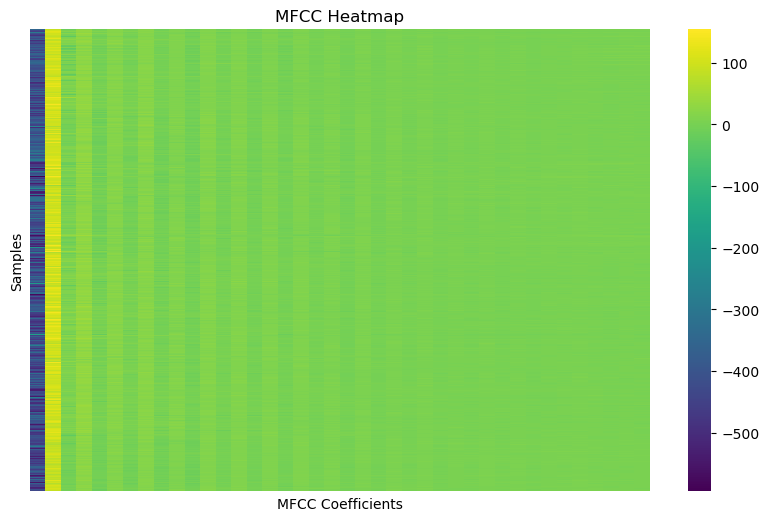

In [17]:
mfcc_array = np.array(extracted_features_df['Features'].tolist())

# Create a heatmap using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(mfcc_array, cmap='viridis', annot=False, xticklabels=False, yticklabels=False)
plt.title('MFCC Heatmap')
plt.xlabel('MFCC Coefficients')
plt.ylabel('Samples')
plt.show()